The dataset has been downloaded from [Kaagle](dd)

- The dataset has been modified to fit the purpose of the study
- The purchased column is added  

-----------

## KNN Training and Predicting

The purchased column is added according to the given conditions 
- if the Age is more than 22
- if the Annual Income is more than 25
- if the Spending Score is more than 30

then the preaching prediction will be set to 1, else it is 0

-------------

### Importing the needed libraries 

Importing the needed librarys 

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

-------

### Dataset Importing

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Purchased
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


<br>
<br>
Cleaning the dataset to avoid errors

In [4]:
EncodeTcpFlag = pd.get_dummies(dataset['Gender'])

In [5]:
dataset = pd.concat((dataset,EncodeTcpFlag),axis =1)
columnsToDrop = ['Gender','CustomerID']
dataset = dataset.drop(columnsToDrop,axis=1)

In [6]:
dataset

,Age,Annual Income (k$),Spending Score (1-100),Purchased,Female,Male
0,19,15,39,0,0,1
1,21,15,81,0,0,1
2,20,16,6,0,1,0
3,23,16,77,0,1,0
4,31,17,40,0,1,0
...,...,...,...,...,...,...
195,35,120,79,1,1,0
196,45,126,28,0,1,0
197,32,126,74,1,0,1
198,32,137,18,0,0,1


In [7]:
dataset.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Purchased',
       'Female', 'Male'],
      dtype='object')

--------------

### Setting X and y Values to train and test

In [8]:
X = pd.DataFrame(dataset, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Female', 'Male'])
y = dataset['Purchased']

In [9]:
X.shape

(200, 5)

In [12]:
y.shape

(200,)

--------------

### Splitting the Data and training it

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [112]:
X_train.shape

(150, 5)

In [111]:
y_train.shape

(150,)

In [110]:
X_test.shape

(50, 5)

<br><br>Traning the data 

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
print(X_train)

[[ 0.59131873 -0.44803883 -0.32700149  0.86266219 -0.86266219]
 [-1.10084935  0.34173303 -0.84206846  0.86266219 -0.86266219]
 [ 0.16827671  1.43237037 -0.4458631   0.86266219 -0.86266219]
 [-0.81882133 -0.03434881 -0.0100372   0.86266219 -0.86266219]
 [-0.32527231  0.6425985   1.57478423 -1.15920231  1.15920231]
 [ 1.08486776 -1.23781069 -1.43637649  0.86266219 -0.86266219]
 [ 1.50790978 -1.16259433 -1.83258185 -1.15920231  1.15920231]
 [ 1.22588177  0.68020669 -0.60434524  0.86266219 -0.86266219]
 [ 1.8604448  -0.86172885 -0.60434524  0.86266219 -0.86266219]
 [ 0.87334675 -0.63607975 -0.0100372   0.86266219 -0.86266219]
 [ 0.02726271  0.37934122  0.98047619 -1.15920231  1.15920231]
 [ 0.59131873 -0.03434881 -0.12889881  0.86266219 -0.86266219]
 [-0.46628632  1.357154    1.41630209  0.86266219 -0.86266219]
 [-0.25476531 -1.42585161  1.89174852  0.86266219 -0.86266219]
 [-0.0432443   0.6425985   1.02009673  0.86266219 -0.86266219]
 [ 0.66182574 -0.03434881 -0.04965774 -1.15920231  1.15

In [20]:
print(X_test)

[[ 0.94385375 -1.42585161 -0.84206846 -1.15920231  1.15920231]
 [ 0.09776971  0.98107216 -1.47599703 -1.15920231  1.15920231]
 [ 1.08486776  0.07847574 -0.16851935 -1.15920231  1.15920231]
 [ 0.66182574  0.00325938 -0.32700149 -1.15920231  1.15920231]
 [-0.81882133  1.01868034  0.74275298 -1.15920231  1.15920231]
 [ 0.52081173  1.39476218 -1.39675596 -1.15920231  1.15920231]
 [-1.17135635 -1.65150072  1.02009673  0.86266219 -0.86266219]
 [ 0.66182574  0.60499032 -0.5647247  -1.15920231  1.15920231]
 [ 1.36689577 -1.53867617 -1.39675596  0.86266219 -0.86266219]
 [ 0.37979772  0.6425985  -1.19865328  0.86266219 -0.86266219]
 [-1.38287736 -0.56086338  0.18806548 -1.15920231  1.15920231]
 [-0.53679332  0.34173303  1.05971727  0.86266219 -0.86266219]
 [-0.1137513   1.357154   -0.72320685  0.86266219 -0.86266219]
 [ 0.59131873  0.6425985  -1.35713542  0.86266219 -0.86266219]
 [ 1.29638877 -0.25999791  0.02958333 -1.15920231  1.15920231]
 [-1.10084935 -1.61389253  1.73326638  0.86266219 -0.86

In [113]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

<br><br> <b>Testing the Training Data

age = 30

Annual Income = 75K

Spending Score = 88%

Female

not male 

The answer should be [1]

In [114]:
print(classifier.predict(sc.transform([[30,75,88,1,0]])))

[1]


<br><br>
age = 18 

Annual Income = 5 

Spending Score = 10% 

Not Female 

male 

The answer should be [0] 


In [116]:
print(classifier.predict(sc.transform([[18,5,10,0,1]])))

[0]


--------

## Accuracy Matrix

In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc = accuracy_score(y_test, y_pred)
print(f'\nThe accuracy is {acc*100}%')

[[16  4]
 [ 3 27]]

The accuracy is 86.0%


---------------

## KNN Cluster (Train & Predict ) 
### Way 2

In [32]:
from sklearn.cluster import KMeans

In [121]:
K_Means_X = X

<br>
<br>
Finding the best number of n_clusters to be used 

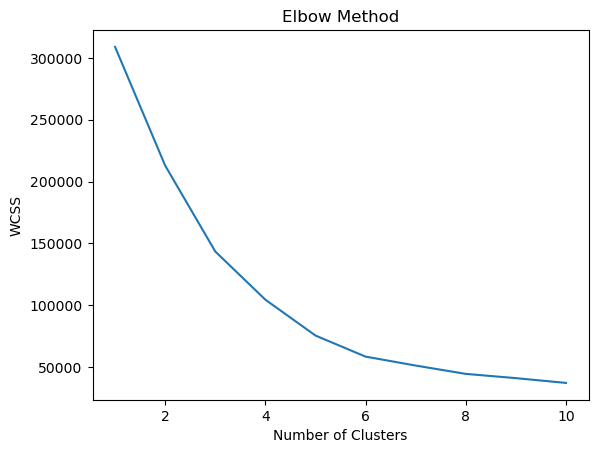

In [93]:
wcss = []
for i in range(1, 11):
     K_Means_CLS = KMeans(n_clusters = i, init= 'k-means++', random_state=100)
     K_Means_CLS.fit(K_Means_X)  
     wcss.append(K_Means_CLS.inertia_)
plt.plot(range(1, 11),wcss)

plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

<br>
<br>
Train and Predict 

In [103]:
K_Means_CLS = KMeans(n_clusters = 3, init = 'k-means++', random_state = 100)
y_kmeans = K_Means_CLS.fit_predict(K_Means_X)

In [104]:
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


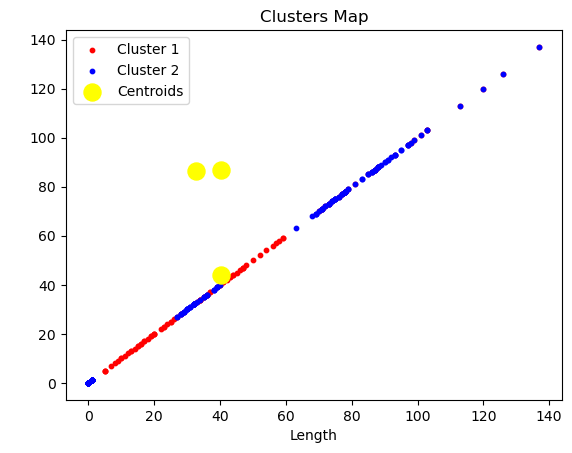

In [108]:
plt.scatter(K_Means_X[y_kmeans ==  0], K_Means_X[y_kmeans ==  0], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(K_Means_X[y_kmeans ==  1], K_Means_X[y_kmeans ==  1], s = 10, c = 'blue', label = 'Cluster 2')

plt.scatter(K_Means_CLS.cluster_centers_[:, 0], K_Means_CLS.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Clusters Map')
plt.xlabel('Length')
plt.ylabel(' ')
plt.legend()
plt.show()

-------------------